        
        Exercice 2 : SVD et approximation de rang faible

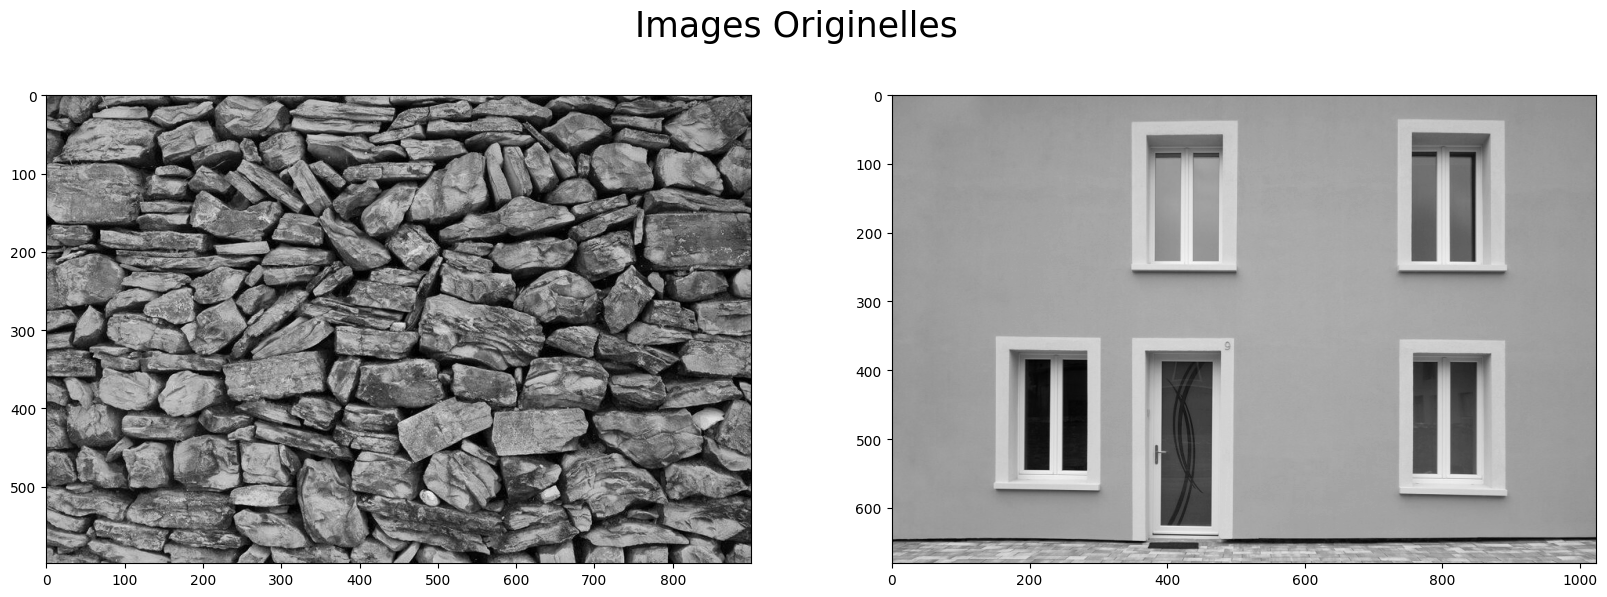

In [2]:
import numpy as np 

from matplotlib import pyplot as plt

img_1 = plt.imread('image_1_gray.jpg')
img_2 = plt.imread('image_2_gray.jpg')

p1 = len(img_1) # Lignes de l'image 1
n1 = len(img_1[0]) # Colonnes de l'image 1

p2 = len(img_2) # Lignes de l'image 2
n2 = len(img_2[0]) # Colonnes de l'image 2


fig, axs = plt.subplots(1, 2, figsize=(20, 20))  
axs[0].imshow(img_1,'gray')
axs[1].imshow(img_2,'gray')
fig.suptitle('Images Originelles', fontsize=25)
plt.subplots_adjust(top=1.53)  # Ajuste la position du titre principal 
plt.show()



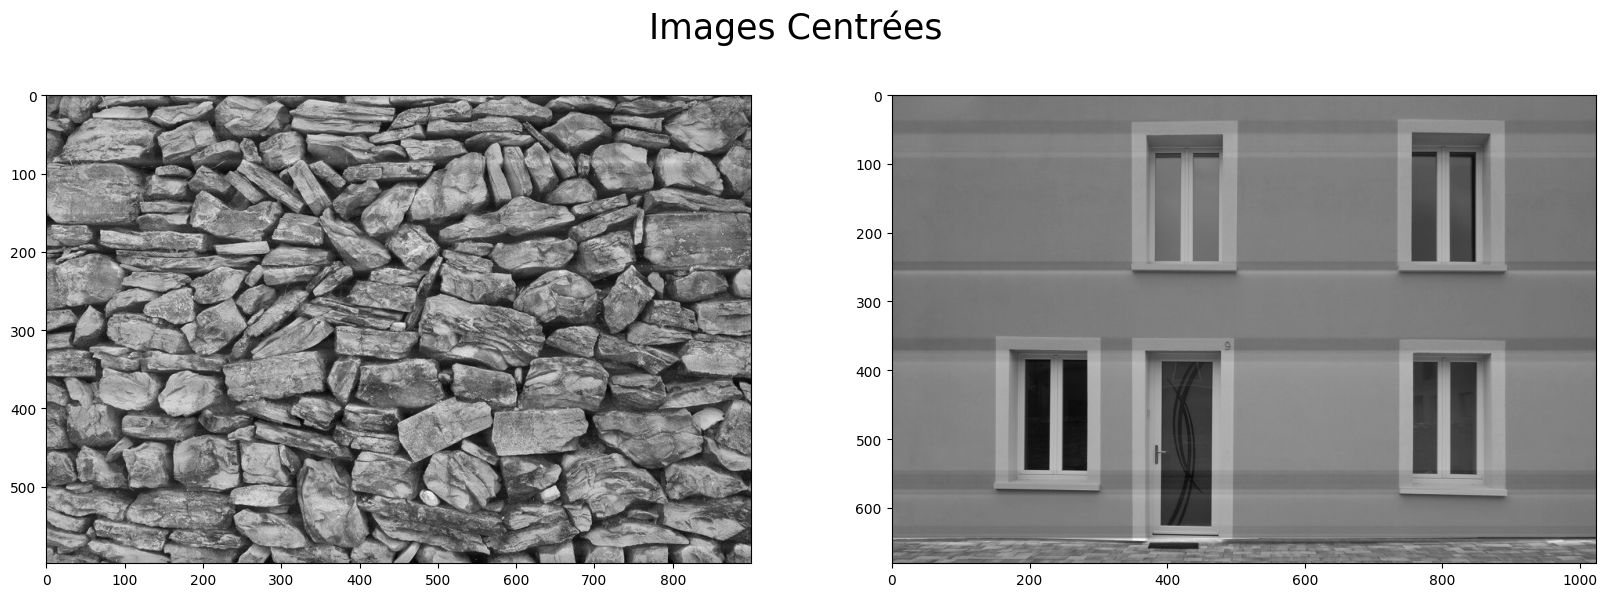

In [3]:
# Centrage des images
img_1_centered = img_1 - np.dot(img_1,np.ones([n1,n1]))/n1
img_2_centered = img_2 - np.dot(img_2,np.ones([n2,n2]))/n2

fig, axs = plt.subplots(1, 2, figsize=(20, 20))  
axs[0].imshow(img_1_centered,'gray')
axs[1].imshow(img_2_centered,'gray')
fig.suptitle('Images Centrées', fontsize=25)
plt.subplots_adjust(top=1.53)  # Ajuste la position du titre principal 
plt.show()


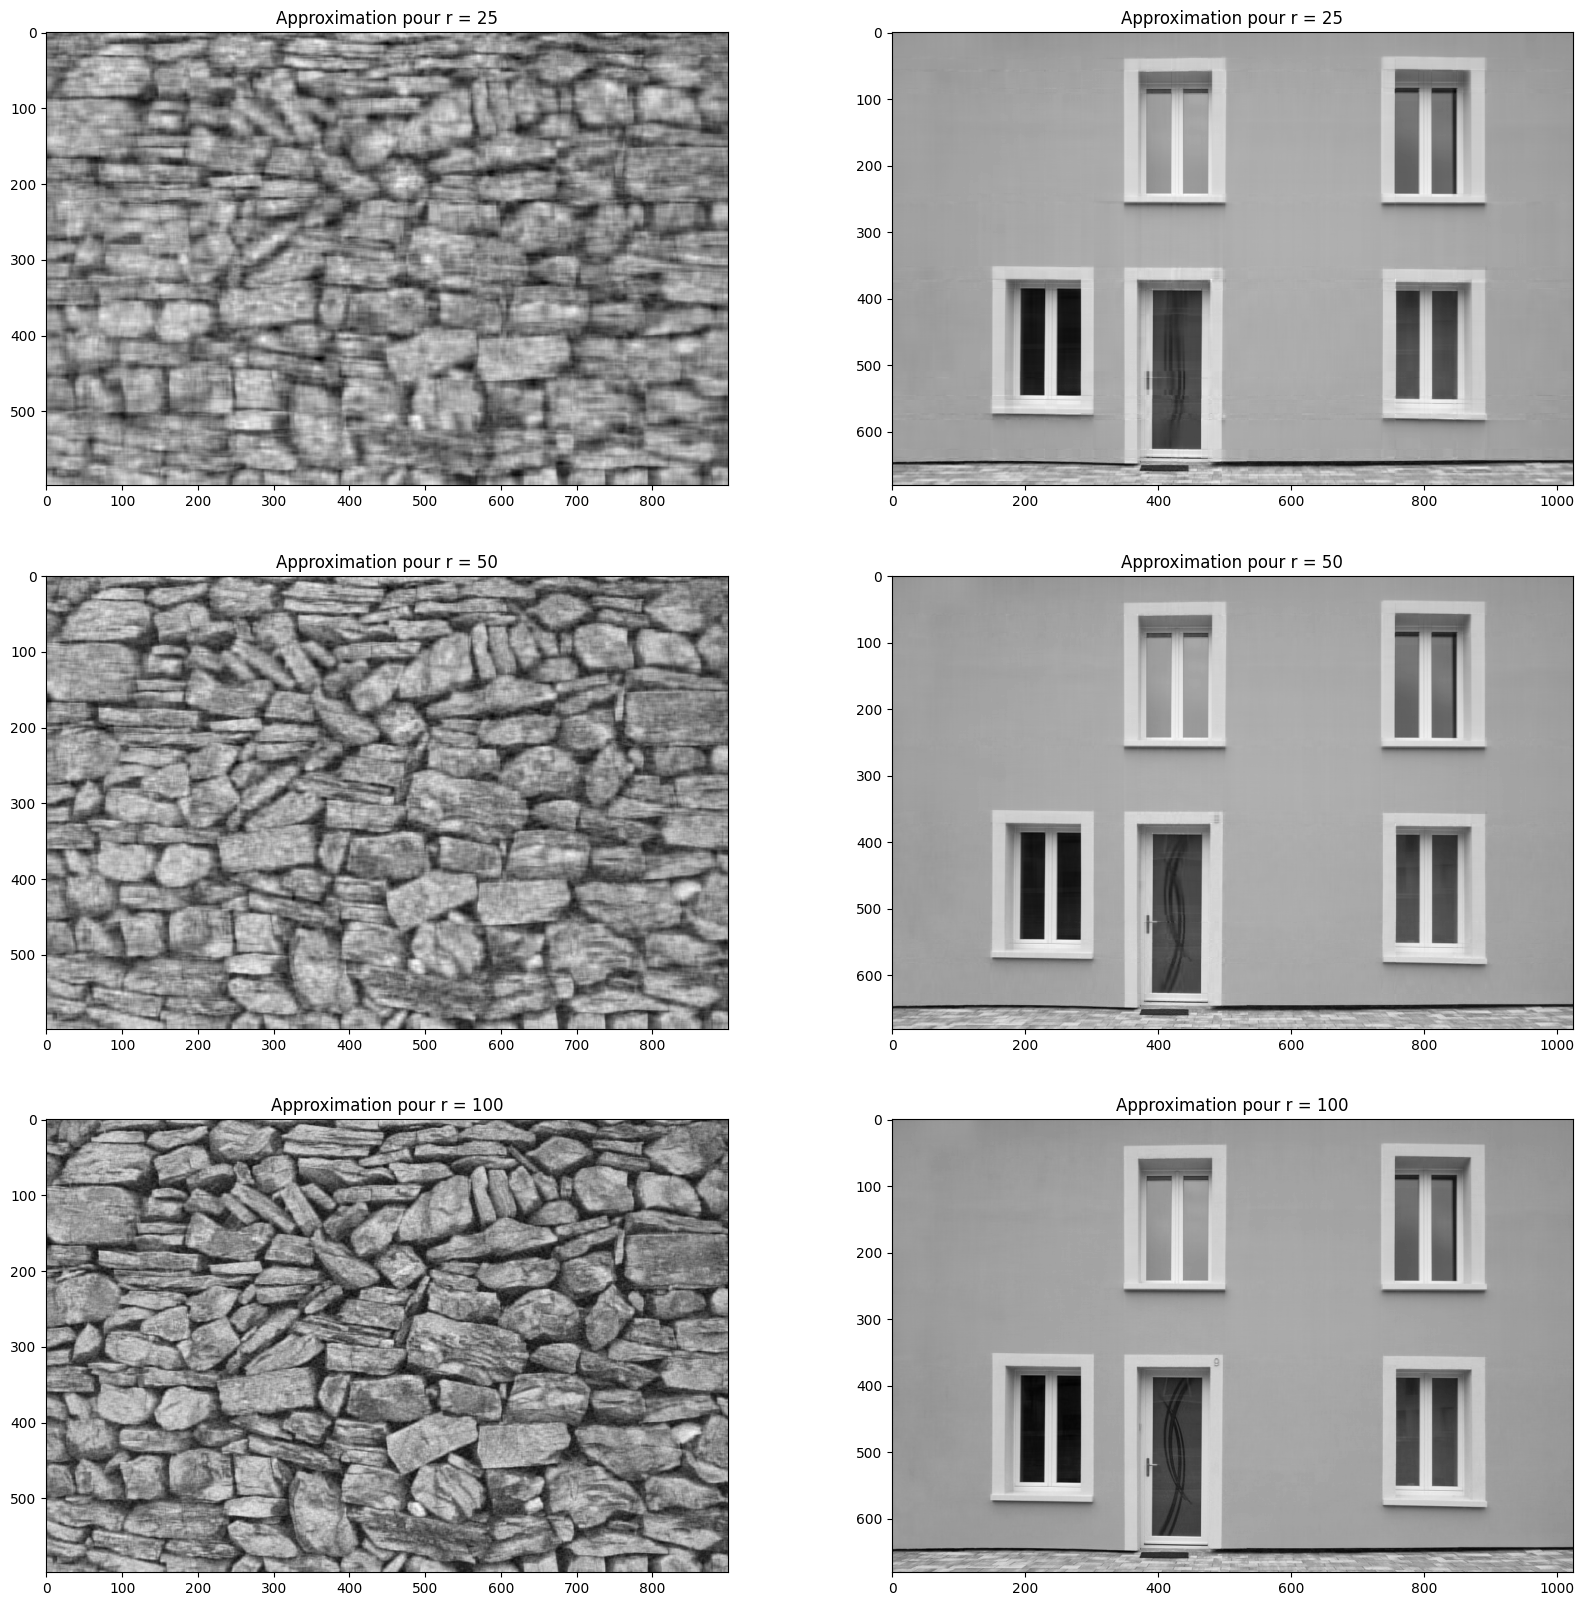

In [ ]:
# Calcul des SVDs

U1, S1, Vt1 = np.linalg.svd(img_1_centered)
U2, S2, Vt2 = np.linalg.svd(img_2_centered)


ranks = [25,50,100]

fig, axs = plt.subplots(3, 2, figsize=(20, 20))  
for i in range(len(ranks)) :
    r = ranks[i]
    U1_r = U1[:,:r] # U1 tronquée au rang r
    Vt1_r = Vt1[:r,:] # Vt1 tronquée au rang r
    S1_r = np.diag(S1[:r]) # S1 est une liste de valeurs propres tronquée au rang r
    Approx_1 = np.linalg.multi_dot([U1_r,S1_r,Vt1_r]) + np.dot(img_1,np.ones([n1,n1]))/n1   # Approxomation avec moyenne restituée
    axs[i,0].imshow(Approx_1,'gray')
    axs[i,0].set_title(f"Approximation pour r = {r}")
    U2_r = U2[:,:r]
    Vt2_r = Vt2[:r,:]
    S2_r = np.diag(S2[:r]) # S2 est une liste de valeurs propres
    Approx_2 = np.linalg.multi_dot([U2_r,S2_r,Vt2_r]) + np.dot(img_2,np.ones([n2,n2]))/n2 # Approxomation avec moyenne restituée
    axs[i,1].set_title(f"Approximation pour r = {r}")
    axs[i,1].imshow(Approx_2,'gray')
plt.show()




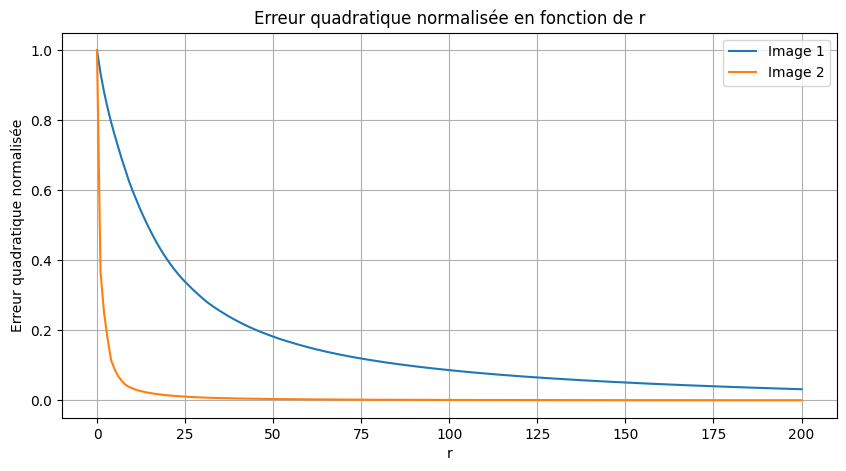

In [ ]:
# Définition des valeurs de r
r_values = np.arange(201)  # On définit r_values comme une liste des valeurs de r de 0 à 200
errors_1 = []
errors_2 = []

# Calcul de la norme de forbenius de l'image originale (X tilde)
norm_X1 = np.linalg.norm(img_1_centered, 'fro')
norm_X2 = np.linalg.norm(img_2_centered, 'fro')

for r in r_values:
    U1_r = U1[:, :r]
    Vt1_r = Vt1[:r, :]
    S1_r = np.diag(S1[:r])
    Approx_1 = np.linalg.multi_dot([U1_r, S1_r, Vt1_r]) # X_r = U1_r * S1_r * Vt1_r
    error_1 = np.linalg.norm(img_1_centered - Approx_1, 'fro')**2 / norm_X1**2
    errors_1.append(error_1)
    
    U2_r = U2[:, :r]
    Vt2_r = Vt2[:r, :]
    S2_r = np.diag(S2[:r])
    Approx_2 = np.linalg.multi_dot([U2_r, S2_r, Vt2_r])
    error_2 = np.linalg.norm(img_2_centered - Approx_2, 'fro')**2 / norm_X2**2
    errors_2.append(error_2)

# Tracé de l'erreur quadratique normalisée
plt.figure(figsize=(10, 5))
plt.plot(r_values, errors_1, label='Image 1')
plt.plot(r_values, errors_2, label='Image 2')
plt.xlabel("r")
plt.ylabel("Erreur quadratique normalisée")
plt.title("Erreur quadratique normalisée en fonction de r")
plt.legend()
plt.grid()
plt.show()